In [82]:
# run pip install -U paos if not already installed

In [83]:
import numpy as np
from paos.classes.abcd import ABCD
import warnings

warnings.filterwarnings("ignore")

In [84]:
# props = ["ABCD", "M", "cin", "cout", "f_eff", "n1n2", "power", "thickness"]
props = ["M", "f_eff", "power", "thickness"]
print_props = lambda abcd: print(
    [f"{prop}: {np.round(getattr(abcd, prop), 3)}" for prop in props]
)

In [85]:
# Lens units are m, angle units are deg

T1 = 670.000e-3  # 

R1 = 1389.365e-3  # powered mirror 1 (S26)
R2 = 506.790e-3  # powered mirror 2 (S35)
R3 = 3896.312e-3  # powered mirror 3 - collimator (S51)

# For the system to be afocal in powered mirrors 2 and 3 (collimated in, collimated out), T2 = f2 + f3.
T2 = (R2 / 2) + (R3 / 2)
T3 = 6194.000e-3  # 

In [86]:
beam_div = np.degrees(0.0)
print(f"beam_div: {beam_div}")
beam_r = 25.0e-6
vt = np.array([beam_r, beam_div])
print(f"vt: {vt}")

f1 = R1 / 2
abcd = ABCD(
    thickness=f1, curvature=-1 / f1
)  # assuming pinhole is at the focus of powered mirror 1
abcd = ABCD(curvature=1 / f1) * abcd  # then the beam is collimated
abcd = ABCD(thickness=T1) * abcd
print_props(abcd)

f2 = R2 / 2
abcd = ABCD(curvature=1 / f2) * abcd
abcd = ABCD(thickness=T2) * abcd
print_props(abcd)

f3 = R3 / 2
abcd = ABCD(curvature=1 / f3) * abcd
abcd = ABCD(thickness=T3) * abcd
print_props(abcd)

vt = abcd() @ vt
psi = np.degrees(np.abs(vt[1])) * 3600
# print(f"vt: {vt[0]*1e6:.3f} um, {psi:.3f} asec")
print(f"vt: {vt[0]*1e3:.3f} mm, {psi:.3f} asec")

print(f"psi: {np.radians(psi * 55 / 3600) * 0.240e3:.3f} mm")
print(f"psi: {np.radians(0.96 * 55 / 3600) * 0.240e3:.3f} mm")

beam_div: 0.0
vt: [2.5e-05 0.0e+00]
['M: inf', 'f_eff: nan', 'power: 0.0', 'thickness: inf']
['M: -0.365', 'f_eff: 0.181', 'power: -15.15', 'thickness: 1.948']
['M: -2251799813685255.5', 'f_eff: -5.341', 'power: 0.0', 'thickness: 1.2026571197905642e+16']
vt: -0.249 mm, 0.966 asec
psi: 0.062 mm
psi: 0.061 mm


In [87]:
# need to define aperture stop such that the beam dimension on M1 is 1/4 the M1 diameter    

In [88]:
size_x = 1.100 / 4
size_y = 0.730 / 4
print(
    f"Size of OGSE footprint on M1 (m)\n"
    f"--------------------------------\n"
    f"X: {size_x:.3f}, Y: {size_y:.3f}\n"
)

lamda = 0.633e-6
lamda = 3.9e-6
print(
    f"Anglular size of PSF (asec)\n"
    f"---------------------------\n"
    f"X: {np.degrees(1.22 * lamda / size_x) * 3600:.7f}, Y: {np.degrees(1.22 * lamda / size_y) * 3600:.7f}\n"
)

Size of OGSE footprint on M1 (m)
--------------------------------
X: 0.275, Y: 0.182

Anglular size of PSF (asec)
---------------------------
X: 3.5687562, Y: 5.3775778



In [89]:
f_eyepiece = 0.240
D_objective = size_x
angular_magnification = 55
f_objective = angular_magnification * f_eyepiece
fratio_objective = f_objective / D_objective
print(f"fratio objective: {fratio_objective:.3f}")

fratio objective: 48.000


In [90]:
# lamda = 3.9e-6
lamda = 0.550e-6
r_Airy = 1.22 * lamda * fratio_objective
print(f"r Airy (mm): {r_Airy * 1e3:.3f}")

r Airy (mm): 0.032


2025-05-16 14:12:09.982 | DEBUG    | paos.util.material:__init__:33 - Using default library of optical materials
2025-05-16 14:12:09.984 | DEBUG    | paos.util.material:__init__:33 - Using default library of optical materials
2025-05-16 14:12:10.011 | DEBUG    | paos.core.run:run:213 - F num: inf, distance to focus: -0.001000
2025-05-16 14:12:10.024 | DEBUG    | paos.core.run:run:213 - F num: inf, distance to focus: -0.168622
2025-05-16 14:12:10.031 | DEBUG    | paos.core.run:run:213 - F num: 3372.420668, distance to focus: -0.168622


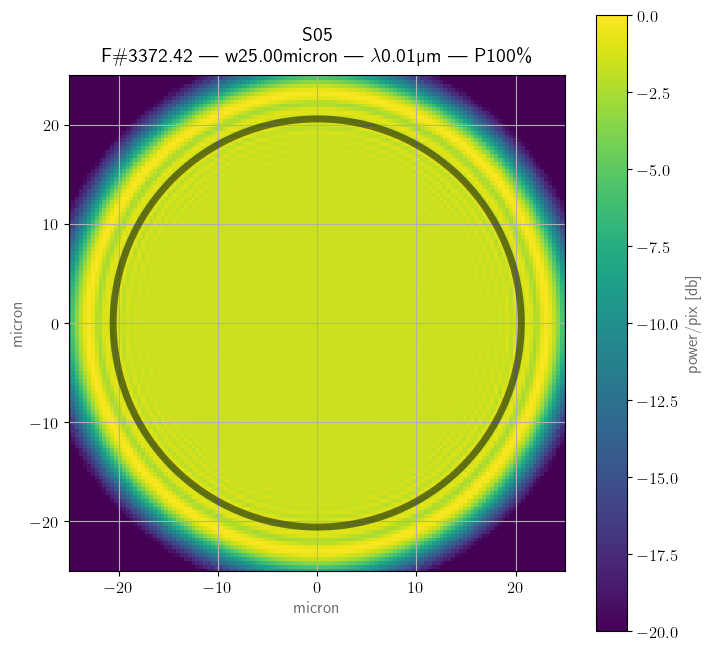

In [96]:
from paos.core.parseConfig import parse_config
from paos.core.run import run
from paos.core.plot import simple_plot
pup_diameter, parameters, wavelengths, fields, opt_chains = parse_config('/Users/andrea/git/PAOS/lens data/lens_file_TA_OGSE_prova.ini')
ret_val = run(pup_diameter, 1.0e-6 * wavelengths[0], parameters['grid_size'], parameters['zoom'], fields[0], opt_chains[0])


from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
key = list(ret_val.keys())[2]  # plot at last optical surface
item = ret_val[key]
simple_plot(fig, ax, key=key, item=item, ima_scale='log')
plt.show()

In [97]:
item

{'aperture': None,
 'amplitude': array([[1.69412370e-09, 1.69420437e-09, 1.69444639e-09, ...,
         1.69484987e-09, 1.69444639e-09, 1.69420437e-09],
        [1.69420436e-09, 1.69428503e-09, 1.69452706e-09, ...,
         1.69493056e-09, 1.69452706e-09, 1.69428503e-09],
        [1.69444639e-09, 1.69452706e-09, 1.69476913e-09, ...,
         1.69517269e-09, 1.69476913e-09, 1.69452706e-09],
        ...,
        [1.69484986e-09, 1.69493056e-09, 1.69517269e-09, ...,
         1.69557634e-09, 1.69517269e-09, 1.69493056e-09],
        [1.69444639e-09, 1.69452706e-09, 1.69476913e-09, ...,
         1.69517269e-09, 1.69476913e-09, 1.69452706e-09],
        [1.69420436e-09, 1.69428503e-09, 1.69452706e-09, ...,
         1.69493056e-09, 1.69452706e-09, 1.69428503e-09]]),
 'wz': 2.500008105681551e-05,
 'distancetofocus': -0.16862158010322997,
 'fratio': 3372.420667757404,
 'phase': array([[ 1.17553444, -2.03658177,  1.03476342, ..., -2.17680059,
          1.03476342, -2.03658177],
        [-2.03658177

In [92]:
abcd = ABCD(
    thickness=f1, curvature=-1 / f1
)  # assuming pinhole is at the focus of powered mirror 1
abcd()

array([[2.        , 0.6946825 ],
       [1.43950654, 1.        ]])